# NASDAQ 100 Stocks Movement Predictor - Exploratory Data Analysis (EDA) 2 

**Author:** Renish Kanjiyani <br>
**Notebook:** EDA - 2 <br>
**Date:** 05/11/2023 <br>
**E-mail:** kanjiyanirenish2@gmail.com

Based on our previous...

In [2]:
# Import all the necessary packages we need 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

In [3]:
# Load our original dataset 

df = pd.read_csv('../nasdaq_stocks_100.csv', sep='\t')

In [4]:
# Viewing the first 5 rows in our dataset 

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [5]:
# Viewing the shape of our dataframe

df.shape

(271680, 8)

In [6]:
# Printing the rows and columns 

print(f"Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

Our dataframe has 271680 rows and 8 columns.


Continuing from the Modeling - 1 Notebook, we will now filter the features we require. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271680 entries, 0 to 271679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       271680 non-null  object 
 1   Open       271680 non-null  float64
 2   High       271680 non-null  float64
 3   Low        271680 non-null  float64
 4   Close      271680 non-null  float64
 5   Adj Close  271680 non-null  float64
 6   Volume     271680 non-null  int64  
 7   Name       271680 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 16.6+ MB


In [8]:
# Let's drop the columns that we do not need 

df = df.drop(['Date', 'Name'], axis=1)

In [9]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800


In [10]:
# Let's create our columns 

df['Adj Closing Yday'] = df['Adj Close'].shift(1)

In [11]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday
0,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,NaN
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407


In [12]:
# Let's check for any NaN values

df.isna().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Adj Closing Yday    1
dtype: int64

In [13]:
# Dropping the NaN row

df = df.dropna()

In [14]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407
5,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339


In [15]:
# Checking the new shape of our dataframe 

df.shape

(271679, 7)

In [16]:
# Printing the rows and columns of the dataframe 

print(f"The dataframe now has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataframe now has 271679 rows and 7 columns.


In [17]:
# Creating the binary column by applying the trading strategy 

df['Adj Closing Price Change'] = np.where(df['Adj Close'] - df['Adj Closing Yday'] > 0, 1, 0)

In [18]:
# Sanity Check

df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
234554,120.089996,124.980003,120.070000,122.190002,122.190002,3805600,119.300003,1
234626,111.730003,111.889999,107.449997,109.480003,109.480003,1995900,110.360001,0
219341,47.860001,48.634998,47.820000,48.424999,45.650814,2290800,45.334999,1
54874,34.919998,35.099998,34.820000,34.980000,34.980000,1537700,35.090000,0
55027,38.840000,39.020000,37.910000,38.230000,38.230000,3311600,38.770000,0
130181,274.000000,274.690002,268.000000,271.709991,271.709991,1345400,272.179993,0
74395,26.855000,26.875000,26.559999,26.735001,26.735001,1919600,26.844999,0
127279,272.250000,294.570007,270.500000,285.010010,285.010010,730900,273.850006,1
15565,49.470001,49.669998,49.099998,49.360001,36.789650,2032000,36.871643,0
121218,1109.699951,1117.250000,1100.500000,1116.560059,1116.560059,1471800,1104.209961,1


In [19]:
# Value counts of the new column 

df['Adj Closing Price Change'].value_counts()

1    142445
0    129234
Name: Adj Closing Price Change, dtype: int64

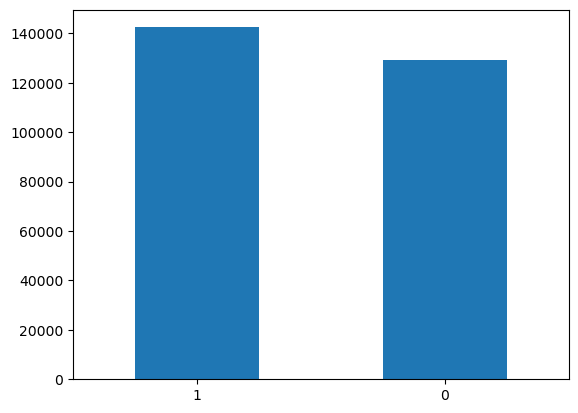

1    0.524314
0    0.475686
Name: Adj Closing Price Change, dtype: float64


In [20]:
# Plot the visualization 

df['Adj Closing Price Change'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=0)
plt.show()

print(df['Adj Closing Price Change'].value_counts(normalize=True))

### Re-Sampling: 

In [21]:
class_0 = df[df['Adj Closing Price Change'] == 0]

In [22]:
class_1 = df[df['Adj Closing Price Change'] == 1]

In [23]:
class_0_count = len(class_0)
class_1_count = len(class_1)

print(class_0_count)
print(class_1_count)

129234
142445


In [24]:
from sklearn.utils import resample

# Determine the desired number of samples for each class
desired_count = class_0_count

# Downsample class 0
downsampled_class_0 = resample(class_0, n_samples=desired_count, random_state=42)

# Downsample class 1
downsampled_class_1 = resample(class_1, n_samples=desired_count, random_state=42)


# Combine the downsampled samples
balanced_dataset = pd.concat([downsampled_class_0, downsampled_class_1])

In [25]:
balanced_dataset['Adj Closing Price Change'].value_counts()

0    129234
1    129234
Name: Adj Closing Price Change, dtype: int64

In [26]:
balanced_dataset

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
256593,191.350006,191.750000,187.399994,188.070007,188.070007,646400,190.020004,0
33386,84.639999,84.980003,83.269997,83.400002,83.400002,341700,84.769997,0
1815,35.527500,35.700001,34.932499,34.959999,33.098114,158119600,33.481556,0
218202,12.205000,12.617500,12.205000,12.555000,11.289334,10760400,11.379254,0
269326,42.430000,42.470001,41.639999,41.810001,36.632263,4498100,37.105381,0
...,...,...,...,...,...,...,...,...
165813,47.500000,47.790001,47.279999,47.610001,45.143173,6595200,45.086273,1
139416,414.660004,418.350006,413.170013,417.559998,417.073212,914800,410.810516,1
16004,57.869999,59.310001,57.689999,59.119999,47.205238,3712600,46.207153,1
173892,11.380000,11.530000,11.350000,11.430000,10.147120,5862500,10.031715,1


In [29]:
balanced_dataset.shape

(258468, 8)

In [60]:
sample_df = balanced_dataset.sample(10000).copy()

In [61]:
sample_df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
236459,99.500000,100.570000,98.389999,98.580002,89.595734,2450000,90.559128,0
78749,47.160000,47.220001,46.480000,46.970001,44.740360,26747200,45.073746,0
116849,434.312103,436.523804,430.013214,433.270996,433.270996,6056416,438.820190,0
176158,24.070000,24.200001,23.740000,23.930000,18.786953,65512400,18.810499,0
137449,58.049999,58.220001,57.169998,57.860001,53.495506,2572100,53.486259,1


In [62]:
sample_df.shape

(10000, 8)

In [63]:
sample_df['Adj Closing Price Change'].value_counts()

0    5010
1    4990
Name: Adj Closing Price Change, dtype: int64

### TO CSV:

In [27]:
df.to_csv('clean_data.csv', index=False)

In [64]:
sample_df.to_csv('sample_balanced_data.csv', index=False)